In [7]:
# Load the CSVs (use the correct file names you just uploaded)
traders_df = pd.read_csv('trader_data.csv.csv')
sentiment_df = pd.read_csv('fear_greed.csv.csv')

# Show top 5 rows
print("Trader Data:")
display(traders_df.head())

print("Market Sentiment:")
display(sentiment_df.head())


Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Market Sentiment:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
import pandas as pd

# Load CSVs
traders_df = pd.read_csv('trader_data.csv.csv', low_memory=False)
sentiment_df = pd.read_csv('fear_greed.csv.csv')

# Convert timestamps to datetime
traders_df['Timestamp'] = pd.to_datetime(traders_df['Timestamp'], unit='ms')
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')

# Format both to DATE only (no time)
traders_df['date'] = traders_df['Timestamp'].dt.date
sentiment_df['date'] = sentiment_df['timestamp'].dt.date

# Merge on date
merged_df = pd.merge(traders_df, sentiment_df[['date', 'classification']], on='date', how='inner')

# Preview
print("Merged dataset preview:")
display(merged_df.head())


Merged dataset preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


Average Closed PnL by Sentiment:
classification
Neutral          22.229713
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Name: Closed PnL, dtype: float64

 Average Fee Paid by Sentiment:
classification
Greed            0.670562
Extreme Greed    0.978567
Fear             1.083267
Neutral          1.224461
Name: Fee, dtype: float64

 Number of Trades by Sentiment:
classification
Extreme Greed      6962
Neutral            7141
Greed             36289
Fear             133871
dtype: int64


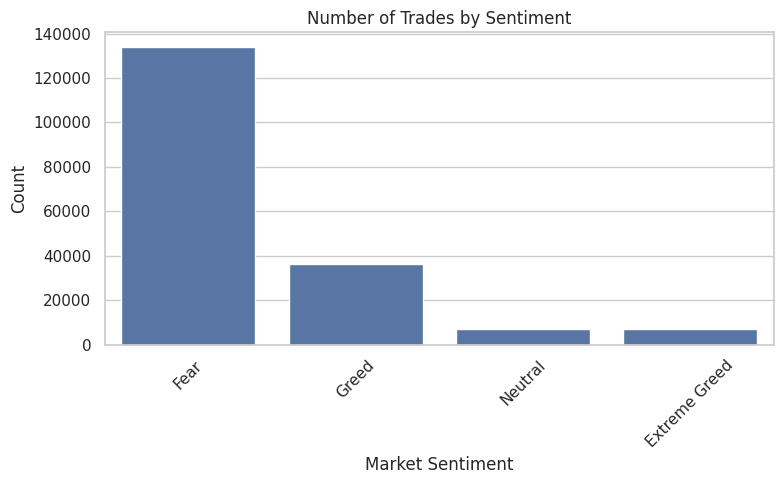

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Group by sentiment classification
grouped = merged_df.groupby('classification')

# 1. Average PnL per sentiment
avg_pnl = grouped['Closed PnL'].mean().sort_values()
print("Average Closed PnL by Sentiment:")
print(avg_pnl)

# 2. Average Fee per sentiment
avg_fee = grouped['Fee'].mean().sort_values()
print("\n Average Fee Paid by Sentiment:")
print(avg_fee)

# 3. Trade Count by sentiment
trade_counts = grouped.size().sort_values()
print("\n Number of Trades by Sentiment:")
print(trade_counts)

# PLOT: Number of trades per sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='classification', data=merged_df, order=merged_df['classification'].value_counts().index)
plt.title("Number of Trades by Sentiment")
plt.ylabel("Count")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_trade_count.png")
plt.show()
